# 1  자료 준비

> pandas-datareader 는 잘 구성된 시계열 데이터 수집 라이브러리로 사용이 간편하고 다양한 시계열 데이터를 수집할 수 있다는 장점이 있다.

> 하지만, 거래소별(KRX, NASDAQ, NYSE 등) 전체 종목 코드(ticker symbol)를 가져오는 기능이 없으며, 야후 파이낸스가 더 이상지원되지 않고(deprecated), 구글 파이낸스는 UNSTABLE_WARNING + RemoteDataError 를 낸다.

> FinanceDataReader는 pandas-datareader 를 대체하기 보다 보완하기 위한 목적으로 만들어졌다. 따라서 본 과제에서는 FinanceDataReader를 채택한다.

> FinanceDataReader를 채택함에 따라 1.1 및 1.3 목차는 스킵한다.

## 1.2  finance-datareader

In [1]:
!pip install -U finance-datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import FinanceDataReader as fdr

In [3]:
fdr.__version__

'0.9.50'

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
stocks = fdr.StockListing('KRX')

In [6]:
stocks

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId
0,005930,KR7005930003,삼성전자,KOSPI,,61900,2,-1000,-1.59,62900,62900,61700,15936188,991042693780,369529539845000,5969782550,STK
1,373220,KR7373220003,LG에너지솔루션,KOSPI,,604000,2,-20000,-3.21,618000,628000,602000,430156,263540556000,141336000000000,234000000,STK
2,000660,KR7000660001,SK하이닉스,KOSPI,,90900,2,-2600,-2.78,93900,93900,90900,2478848,227422978900,66175414978500,728002365,STK
3,207940,KR7207940008,삼성바이오로직스,KOSPI,,901000,1,1000,0.11,899000,914000,899000,56318,50927269000,64127774000000,71174000,STK
4,006400,KR7006400006,삼성SDI,KOSPI,,759000,1,12000,1.61,749000,783000,739000,428575,324845194000,52192278270000,68764530,STK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,308700,KR7308700004,테크엔,KONEX,일반기업부,590,3,0,0.00,630,648,590,15425,9764548,2360000000,4000000,KNX
2667,267810,KR7267810000,앙츠,KONEX,일반기업부,1165,1,15,1.30,1250,1270,1165,17,21185,2081855000,1787000,KNX
2668,215050,KR7215050006,비엔디생활건강,KONEX,일반기업부,912,0,0,0.00,0,0,0,0,0,1934959392,2121666,KNX
2669,267060,KR7267060002,명진홀딩스,KONEX,일반기업부,181,0,0,0.00,0,0,0,0,0,1654666524,9141804,KNX


## 1.4  주가 및 거래량

In [7]:
# KOSPI 200
df_ks200 = fdr.DataReader('ks200', '2020')
df_ks200

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-14,323.410004,324.730011,320.859985,321.529999,321.529999,264249


In [8]:
df_ks200 = fdr.DataReader('KS200', '2017', '2018')

HTTP Error 404: Not Found  - symbol "KS200"not found or invalid periods


In [9]:
df_ks200 = fdr.DataReader('KS200')
df_ks200

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-11-14,323.410004,324.730011,320.859985,321.529999,321.529999,264249


> 자료가 1개밖에 나오지 않는다.

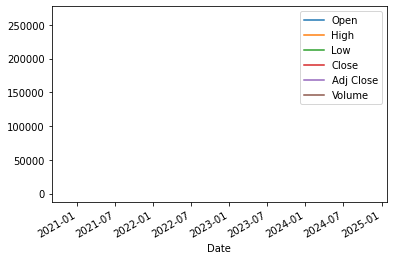

In [10]:
df_ks200.plot()

> 라이브러리의 문제로, KOSPI200의 자료를 2022-11-10 외에는 불러올 수 없었다.

> 이에 따라 KOSPI 200 대신 KOSPI 지수를 대체자료로 선정하였다.

In [11]:
# 대체자료: KOSPI 200 -> KOSPI 선택
# KOSPI 지수의 2017년 자료 선택 (총 1개년)
df_ks11 = fdr.DataReader('ks11', '2017', '2018')

In [12]:
df_ks11

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,2022.229980,2031.790039,2015.680054,2026.160034,2026.160034,229900
2017-01-03,2034.310059,2044.069946,2028.469971,2043.969971,2043.969971,268100
2017-01-04,2046.290039,2046.290039,2040.609985,2045.640015,2045.640015,371500
2017-01-05,2045.520020,2046.500000,2039.489990,2041.949951,2041.949951,541300
2017-01-06,2048.110107,2051.840088,2045.660034,2049.120117,2049.120117,455400
...,...,...,...,...,...,...
2017-12-21,2471.340088,2471.729980,2429.830078,2429.830078,2429.830078,247300
2017-12-22,2437.590088,2444.570068,2426.939941,2440.540039,2440.540039,230400
2017-12-26,2447.669922,2457.189941,2427.340088,2427.340088,2427.340088,224600


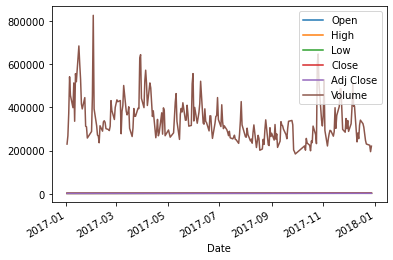

In [13]:
df_ks11.plot()

In [14]:
# 종가, 거래량만 추출
df_ks = df_ks11[['Close', 'Volume']]
df_ks

,Close,Volume
Date,,
2017-01-02,2026.160034,229900
2017-01-03,2043.969971,268100
2017-01-04,2045.640015,371500
2017-01-05,2041.949951,541300
2017-01-06,2049.120117,455400
...,...,...
2017-12-21,2429.830078,247300
2017-12-22,2440.540039,230400
2017-12-26,2427.340088,224600


In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
# MinMaxScaler 활용
# '0~1' 사이의 범위(range)로 데이터를 표준화
df_ks_std = MinMaxScaler().fit_transform(df_ks)

In [17]:
df_ks_std = pd.DataFrame(df_ks_std)
df_ks_std

,0,1
0,0.000000,0.071262
1,0.033489,0.130828
2,0.036630,0.292063
3,0.029691,0.556838
4,0.043173,0.422891
...,...,...
236,0.759049,0.098394
237,0.779188,0.072041
238,0.754367,0.062997
239,0.771911,0.016685


In [18]:
# Column명 변경
df_ks_std.columns = ['Price', 'Volume']
df_ks_std

,Price,Volume
0,0.000000,0.071262
1,0.033489,0.130828
2,0.036630,0.292063
3,0.029691,0.556838
4,0.043173,0.422891
...,...,...
236,0.759049,0.098394
237,0.779188,0.072041
238,0.754367,0.062997
239,0.771911,0.016685


In [19]:
print(df_ks_std['Price'].min())
print(df_ks_std['Price'].max())
print(df_ks_std['Volume'].min())
print(df_ks_std['Volume'].max())

0.0
0.9999999999999996
0.0
1.0


In [20]:
print(df_ks_std.shape)

(241, 2)


각 변수의 data 0~1 범위로 Scaling 완료.

# 2  Clustering - price

## 2.1 PCA

In [21]:
from sklearn.decomposition import PCA

In [22]:
# Scaling 완료한 data에서 Price만 추출 후 2차원 배열로 변환
df_price = np.array(df_ks_std['Price']).reshape(-1,1)

In [23]:
# PCA modeling
# n_components=1
pca = PCA(n_components=1)

In [24]:
# data transform
pca_price = pca.fit_transform(df_price)
pca_price.shape

(241, 1)

In [25]:
df_pca = pd.DataFrame(data=pca_price, columns=['Price'])
df_pca

,Price
0,0.534417
1,0.500928
2,0.497788
3,0.504726
4,0.491244
...,...
236,-0.224632
237,-0.244771
238,-0.219950
239,-0.237494


In [26]:
from sklearn.cluster import KMeans

> 1부터 15까지 군집화를 해보고, 가장 적절한 응집도의 군집개수를 정해주기 위하여 그래프를 그려본다.

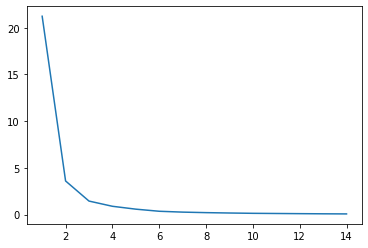

In [27]:
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_pca)
    
    x.append(k)
    y.append(kmeans.inertia_)

plt.plot(x, y)

> 군집의 개수 별 응집도 그래프를 그려보니 3~5개 정도가 적당할 것 같다.

> 이에 따라 Elbow Point를 4로 지정하고 군집화를 해보도록 한다. 

In [28]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

KMeans(n_clusters=4)

In [29]:
df_pca['labels'] = kmeans.predict(df_pca)
df_pca

,Price,labels
0,0.534417,3
1,0.500928,3
2,0.497788,3
3,0.504726,3
4,0.491244,3
...,...,...
236,-0.224632,2
237,-0.244771,0
238,-0.219950,2
239,-0.237494,0


> labels가 1이라는 것은 해당 데이터가 1번 군집에 포함되었다는 의미이다. 

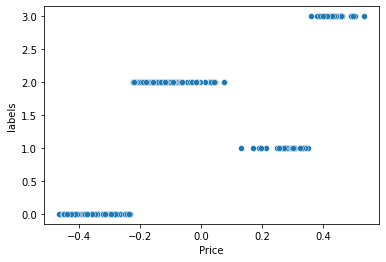

In [30]:
sns.scatterplot(x='Price', y='labels', data=df_pca)

> 성공적으로 Clustering을 통한 분류를 완료하였다. (4개 군집)

## 2.2 t-SNE

In [31]:
from sklearn.manifold import TSNE

In [32]:
# t-sne 모델 생성
# n_components=1
tsne = TSNE(n_components=1)

In [33]:
df_price.shape

(241, 1)

In [34]:
tsne_price = tsne.fit_transform(df_price)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [35]:
tsne_price.shape

(241, 1)

In [36]:
df_tsne = pd.DataFrame(data=tsne_price, columns=['Price'])
df_tsne

,Price
0,29.440247
1,29.152905
2,29.116869
3,29.203882
4,28.970526
...,...
236,-12.650459
237,-13.512368
238,-12.429179
239,-13.181623


> 1부터 10까지 군집화를 해보고, 가장 적절한 응집도의 군집개수를 정해주기 위하여 그래프를 그려본다.

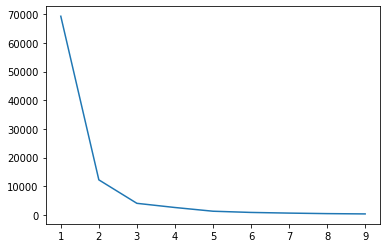

In [37]:
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_tsne)
    
    x.append(k)
    y.append(kmeans.inertia_)

plt.plot(x, y)

> 군집의 개수 별 응집도 그래프를 그려보니 2~4개 정도가 적당할 것 같다.

> 이에 따라 Elbow Point를 3으로 지정하고 군집화를 해보도록 한다. 

In [38]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_tsne)

KMeans(n_clusters=3)

In [39]:
df_tsne['labels'] = kmeans.predict(df_tsne)
df_tsne

,Price,labels
0,29.440247,1
1,29.152905,1
2,29.116869,1
3,29.203882,1
4,28.970526,1
...,...,...
236,-12.650459,2
237,-13.512368,2
238,-12.429179,2
239,-13.181623,2


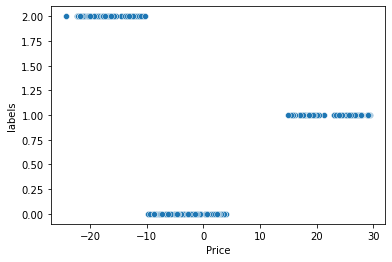

In [40]:
sns.scatterplot(x='Price', y='labels', data=df_tsne)

> 성공적으로 Clustering을 통한 분류를 완료하였다. (3개 군집)

## 2.3 UMAP

In [41]:
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [42]:
from umap import UMAP

In [43]:
# UMAP 모델 생성
# n_components=1
reducer = UMAP(n_components=1)

In [44]:
umap_price = reducer.fit_transform(df_price)
umap_price.shape

(241, 1)

In [45]:
df_umap = pd.DataFrame(data=umap_price, columns=['Price'])
df_umap

,Price
0,-16.937355
1,-16.981844
2,-17.007065
3,-16.984428
4,-17.061136
...,...
236,7.853629
237,8.557090
238,7.712867
239,8.320087


> 1부터 10까지 군집화를 해보고, 가장 적절한 응집도의 군집개수를 정해주기 위하여 그래프를 그려본다.

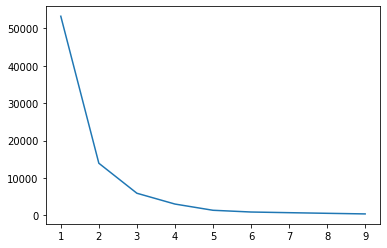

In [46]:
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_umap)
    
    x.append(k)
    y.append(kmeans.inertia_)

plt.plot(x, y)

> 군집의 개수 별 응집도 그래프를 그려보니 3~5개 정도가 적당할 것 같다.

> 이에 따라 Elbow Point를 4로 지정하고 군집화를 해보도록 한다. 

In [47]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_umap)

KMeans(n_clusters=4)

In [48]:
df_umap['labels'] = kmeans.predict(df_umap)
df_umap

,Price,labels
0,-16.937355,2
1,-16.981844,2
2,-17.007065,2
3,-16.984428,2
4,-17.061136,2
...,...,...
236,7.853629,3
237,8.557090,3
238,7.712867,3
239,8.320087,3


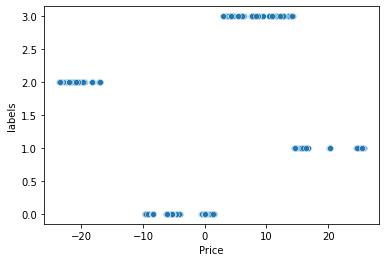

In [49]:
sns.scatterplot(x='Price', y='labels', data=df_umap)

> 성공적으로 Clustering을 통한 분류를 완료하였다.  (4개 군집)

## 2.4 소요시간 비교

In [50]:
import time

In [51]:
# trial 1
iter_num = 3

# PCA 시간 측정
PCA_total = 0 
for j in range(0, iter_num):
  PCA_time = time.time()    
  PCA().fit_transform(df_price)
  PCA_time = time.time() - PCA_time
  PCA_total+=PCA_time

# TSNE 시간 측정
TSNE_total = 0 
for j in range(0, iter_num):
  TSNE_time = time.time()    
  TSNE().fit_transform(df_price)
  TSNE_time = time.time() - TSNE_time
  TSNE_total+=TSNE_time

# UMAP 시간 측정
UMAP_total = 0
for j in range(0, iter_num):
  UMAP_time = time.time()    
  UMAP().fit_transform(df_price)
  UMAP_time = time.time() - UMAP_time
  UMAP_total+=UMAP_time
  
TSNE_total /=iter_num
PCA_total /=iter_num
UMAP_total /=iter_num

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [52]:
print("*** PCA vs TSNE vs UMAP 소요시간 비교 #1 ***")
print("PCA_mean: {}, TSNE_mean: {}, UMAP_mean: {}".format(round(PCA_total, 2), round(TSNE_total, 2), round(UMAP_total, 2)))

*** PCA vs TSNE vs UMAP 소요시간 비교 #1 ***
PCA_mean: 0.0, TSNE_mean: 5.53, UMAP_mean: 3.01


In [53]:
# trial 2
iter_num = 3

# PCA 시간 측정
PCA_total = 0 
for j in range(0, iter_num):
  PCA_time = time.time()    
  PCA().fit_transform(df_price)
  PCA_time = time.time() - PCA_time
  PCA_total+=PCA_time

# TSNE 시간 측정
TSNE_total = 0 
for j in range(0, iter_num):
  TSNE_time = time.time()    
  TSNE().fit_transform(df_price)
  TSNE_time = time.time() - TSNE_time
  TSNE_total+=TSNE_time

# UMAP 시간 측정
UMAP_total = 0
for j in range(0, iter_num):
  UMAP_time = time.time()    
  UMAP().fit_transform(df_price)
  UMAP_time = time.time() - UMAP_time
  UMAP_total+=UMAP_time
  
TSNE_total /=iter_num
PCA_total /=iter_num
UMAP_total /=iter_num

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [54]:
print("*** PCA vs TSNE vs UMAP 소요시간 비교 #2 ***")
print("PCA_mean: {}, TSNE_mean: {}, UMAP_mean: {}".format(round(PCA_total, 2), round(TSNE_total, 2), round(UMAP_total, 2)))

*** PCA vs TSNE vs UMAP 소요시간 비교 #2 ***
PCA_mean: 0.0, TSNE_mean: 1.25, UMAP_mean: 3.01


In [55]:
# trial 3
iter_num = 3

# PCA 시간 측정
PCA_total = 0 
for j in range(0, iter_num):
  PCA_time = time.time()    
  PCA().fit_transform(df_price)
  PCA_time = time.time() - PCA_time
  PCA_total+=PCA_time

# TSNE 시간 측정
TSNE_total = 0 
for j in range(0, iter_num):
  TSNE_time = time.time()    
  TSNE().fit_transform(df_price)
  TSNE_time = time.time() - TSNE_time
  TSNE_total+=TSNE_time

# UMAP 시간 측정
UMAP_total = 0
for j in range(0, iter_num):
  UMAP_time = time.time()    
  UMAP().fit_transform(df_price)
  UMAP_time = time.time() - UMAP_time
  UMAP_total+=UMAP_time
  
TSNE_total /=iter_num
PCA_total /=iter_num
UMAP_total /=iter_num

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [56]:
print("*** PCA vs TSNE vs UMAP 소요시간 비교 #3 ***")
print("PCA_mean: {}, TSNE_mean: {}, UMAP_mean: {}".format(round(PCA_total, 2), round(TSNE_total, 2), round(UMAP_total, 2)))

*** PCA vs TSNE vs UMAP 소요시간 비교 #3 ***
PCA_mean: 0.0, TSNE_mean: 1.29, UMAP_mean: 3.1


In [57]:
# trial 4
iter_num = 3

# PCA 시간 측정
PCA_total = 0 
for j in range(0, iter_num):
  PCA_time = time.time()    
  PCA().fit_transform(df_price)
  PCA_time = time.time() - PCA_time
  PCA_total+=PCA_time

# TSNE 시간 측정
TSNE_total = 0 
for j in range(0, iter_num):
  TSNE_time = time.time()    
  TSNE().fit_transform(df_price)
  TSNE_time = time.time() - TSNE_time
  TSNE_total+=TSNE_time

# UMAP 시간 측정
UMAP_total = 0
for j in range(0, iter_num):
  UMAP_time = time.time()    
  UMAP().fit_transform(df_price)
  UMAP_time = time.time() - UMAP_time
  UMAP_total+=UMAP_time
  
TSNE_total /=iter_num
PCA_total /=iter_num
UMAP_total /=iter_num

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [58]:
print("*** PCA vs TSNE vs UMAP 소요시간 비교 #4 ***")
print("PCA_mean: {}, TSNE_mean: {}, UMAP_mean: {}".format(round(PCA_total, 2), round(TSNE_total, 2), round(UMAP_total, 2)))

*** PCA vs TSNE vs UMAP 소요시간 비교 #4 ***
PCA_mean: 0.0, TSNE_mean: 1.88, UMAP_mean: 3.02


> 4회 평균 소요 시간: PCA < TSNE < UMAP

> 순서는 첫 1회 제외 모두 동일. PCA가 가장 시간이 적게 소요되며, UMAP이 가장 시간이 오래 소요된다.

# 3 Clustering - price, volume

## 3.1 PCA

In [59]:
# PCA modeling
# n_components=2
pca = PCA(n_components=2)

In [60]:
# data transform
# 앞서 Price, Volume을 Scaling한 DataFrame 사용
pca_ks = pca.fit_transform(df_ks_std)
pca_ks.shape

(241, 2)

In [61]:
df_pca = pd.DataFrame(data=pca_ks, columns=['Price', 'Volume'])
df_pca

,Price,Volume
0,0.483293,-0.286351
1,0.463717,-0.220880
2,0.496095,-0.062898
3,0.561066,0.193875
4,0.518470,0.066168
...,...,...
236,-0.251227,-0.093031
237,-0.276665,-0.114313
238,-0.254440,-0.128592
239,-0.281734,-0.169915


> 1부터 15까지 군집화를 해보고, 가장 적절한 응집도의 군집개수를 정해주기 위하여 그래프를 그려본다.

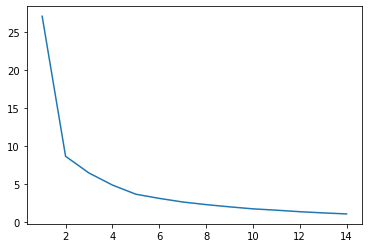

In [62]:
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 15):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_pca)
    
    x.append(k)
    y.append(kmeans.inertia_)

plt.plot(x, y)

> 군집의 개수 별 응집도 그래프를 그려보니 3~5개 정도가 적당할 것 같다.

> 이에 따라 Elbow Point를 4로 지정하고 군집화를 해보도록 한다. 

In [63]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_pca)

KMeans(n_clusters=4)

In [64]:
df_pca['labels'] = kmeans.predict(df_pca)
df_pca

,Price,Volume,labels
0,0.483293,-0.286351,2
1,0.463717,-0.220880,2
2,0.496095,-0.062898,2
3,0.561066,0.193875,1
4,0.518470,0.066168,1
...,...,...,...
236,-0.251227,-0.093031,0
237,-0.276665,-0.114313,0
238,-0.254440,-0.128592,0
239,-0.281734,-0.169915,0


> labels가 1이라는 것은 해당 데이터가 1번 군집에 포함되었다는 의미이다. 

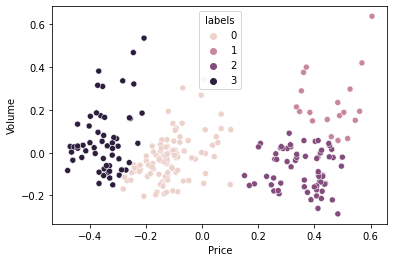

In [65]:
sns.scatterplot(x='Price', y='Volume', hue='labels', data=df_pca)

> 성공적으로 Clustering을 통한 분류를 완료하였다. (4개 군집)

## 3.2 t-SNE

In [66]:
# t-sne 모델 생성
# n_components=2
tsne = TSNE(n_components=2)

In [67]:
tsne_ks = tsne.fit_transform(df_ks_std)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [68]:
df_tsne = pd.DataFrame(data=tsne_ks, columns=['Price', 'Volume'])
df_tsne

,Price,Volume
0,-13.170620,19.674286
1,-13.912208,19.394585
2,-17.954142,17.252077
3,-22.689611,14.439067
4,-20.960407,15.497802
...,...,...
236,6.760567,-9.003216
237,7.276445,-10.086293
238,6.371462,-9.857643
239,6.684070,-11.109292


> 1부터 10까지 군집화를 해보고, 가장 적절한 응집도의 군집개수를 정해주기 위하여 그래프를 그려본다.

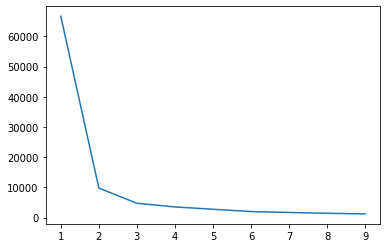

In [69]:
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_tsne)
    
    x.append(k)
    y.append(kmeans.inertia_)

plt.plot(x, y)

> 군집의 개수 별 응집도 그래프를 그려보니 2~4개 정도가 적당할 것 같다.

> 이에 따라 Elbow Point를 3으로 지정하고 군집화를 해보도록 한다. 

In [70]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_tsne)

KMeans(n_clusters=3)

In [71]:
df_tsne['labels'] = kmeans.predict(df_tsne)
df_tsne

,Price,Volume,labels
0,-13.170620,19.674286,1
1,-13.912208,19.394585,1
2,-17.954142,17.252077,1
3,-22.689611,14.439067,1
4,-20.960407,15.497802,1
...,...,...,...
236,6.760567,-9.003216,2
237,7.276445,-10.086293,2
238,6.371462,-9.857643,2
239,6.684070,-11.109292,2


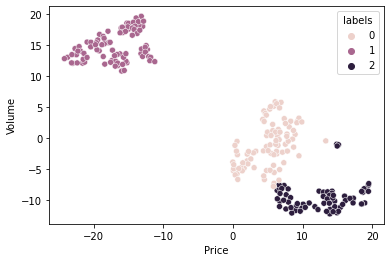

In [72]:
sns.scatterplot(x='Price', y='Volume', hue='labels', data=df_tsne)

> 성공적으로 Clustering을 통한 분류를 완료하였다. (3개 군집)

## 3.3 UMAP

In [73]:
# t-sne 모델 생성
# n_components=2
reducer = UMAP(n_components=2)

In [74]:
umap_ks = reducer.fit_transform(df_ks_std)
umap_ks.shape

(241, 2)

In [75]:
df_umap = pd.DataFrame(data=umap_ks, columns=['Price', 'Volume'])
df_umap

,Price,Volume
0,19.032728,11.015728
1,19.013220,10.976380
2,12.581263,4.444076
3,13.160709,2.371156
4,12.658562,3.589281
...,...,...
236,-5.404832,0.003447
237,-5.288444,-0.410258
238,-5.409673,-0.275557
239,-5.215791,-0.582287


> 1부터 10까지 군집화를 해보고, 가장 적절한 응집도의 군집개수를 정해주기 위하여 그래프를 그려본다.

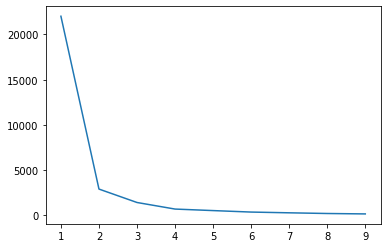

In [76]:
x = []   # k 가 몇개인지 
y = []   # 응집도가 몇인지 

for k in range(1, 10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(df_umap)
    
    x.append(k)
    y.append(kmeans.inertia_)

plt.plot(x, y)

> 군집의 개수 별 응집도 그래프를 그려보니 3~5개 정도가 적당할 것 같다.

> 이에 따라 Elbow Point를 4로 지정하고 군집화를 해보도록 한다. 

In [77]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df_umap)

KMeans(n_clusters=4)

In [78]:
df_umap['labels'] = kmeans.predict(df_umap)
df_umap

,Price,Volume,labels
0,19.032728,11.015728,0
1,19.013220,10.976380,0
2,12.581263,4.444076,2
3,13.160709,2.371156,2
4,12.658562,3.589281,2
...,...,...,...
236,-5.404832,0.003447,1
237,-5.288444,-0.410258,1
238,-5.409673,-0.275557,1
239,-5.215791,-0.582287,1


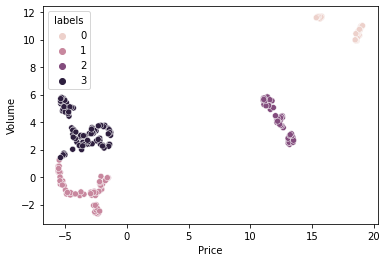

In [79]:
sns.scatterplot(x='Price', y='Volume', hue='labels', data=df_umap)

> 성공적으로 Clustering을 통한 분류를 완료하였다.

## 3.4 소요시간 비교

In [80]:
import time

In [81]:
# trial 1
iter_num = 3

# PCA 시간 측정
PCA_total = 0 
for j in range(0, iter_num):
  PCA_time = time.time()    
  PCA().fit_transform(df_ks_std)
  PCA_time = time.time() - PCA_time
  PCA_total+=PCA_time

# TSNE 시간 측정
TSNE_total = 0 
for j in range(0, iter_num):
  TSNE_time = time.time()    
  TSNE().fit_transform(df_ks_std)
  TSNE_time = time.time() - TSNE_time
  TSNE_total+=TSNE_time

# UMAP 시간 측정
UMAP_total = 0
for j in range(0, iter_num):
  UMAP_time = time.time()    
  UMAP().fit_transform(df_ks_std)
  UMAP_time = time.time() - UMAP_time
  UMAP_total+=UMAP_time

TSNE_total /=iter_num
PCA_total /=iter_num
UMAP_total /=iter_num

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [82]:
print("*** PCA vs TSNE vs UMAP 소요시간 비교 #1 ***")
print("PCA_mean: {}, TSNE_mean: {}, UMAP_mean: {}".format(round(PCA_total, 2), round(TSNE_total, 2), round(UMAP_total, 2)))

*** PCA vs TSNE vs UMAP 소요시간 비교 #1 ***
PCA_mean: 0.0, TSNE_mean: 1.34, UMAP_mean: 3.05


In [83]:
# trial 2
iter_num = 3

# PCA 시간 측정
PCA_total = 0 
for j in range(0, iter_num):
  PCA_time = time.time()    
  PCA().fit_transform(df_ks_std)
  PCA_time = time.time() - PCA_time
  PCA_total+=PCA_time

# TSNE 시간 측정
TSNE_total = 0 
for j in range(0, iter_num):
  TSNE_time = time.time()    
  TSNE().fit_transform(df_ks_std)
  TSNE_time = time.time() - TSNE_time
  TSNE_total+=TSNE_time

# UMAP 시간 측정
UMAP_total = 0
for j in range(0, iter_num):
  UMAP_time = time.time()    
  UMAP().fit_transform(df_ks_std)
  UMAP_time = time.time() - UMAP_time
  UMAP_total+=UMAP_time

TSNE_total /=iter_num
PCA_total /=iter_num
UMAP_total /=iter_num

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [84]:
print("*** PCA vs TSNE vs UMAP 소요시간 비교 #2 ***")
print("PCA_mean: {}, TSNE_mean: {}, UMAP_mean: {}".format(round(PCA_total, 2), round(TSNE_total, 2), round(UMAP_total, 2)))

*** PCA vs TSNE vs UMAP 소요시간 비교 #2 ***
PCA_mean: 0.0, TSNE_mean: 1.3, UMAP_mean: 3.07


In [85]:
# trial 3
iter_num = 3

# PCA 시간 측정
PCA_total = 0 
for j in range(0, iter_num):
  PCA_time = time.time()    
  PCA().fit_transform(df_ks_std)
  PCA_time = time.time() - PCA_time
  PCA_total+=PCA_time

# TSNE 시간 측정
TSNE_total = 0 
for j in range(0, iter_num):
  TSNE_time = time.time()    
  TSNE().fit_transform(df_ks_std)
  TSNE_time = time.time() - TSNE_time
  TSNE_total+=TSNE_time

# UMAP 시간 측정
UMAP_total = 0
for j in range(0, iter_num):
  UMAP_time = time.time()    
  UMAP().fit_transform(df_ks_std)
  UMAP_time = time.time() - UMAP_time
  UMAP_total+=UMAP_time

TSNE_total /=iter_num
PCA_total /=iter_num
UMAP_total /=iter_num

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

In [86]:
print("*** PCA vs TSNE vs UMAP 소요시간 비교 #3 ***")
print("PCA_mean: {}, TSNE_mean: {}, UMAP_mean: {}".format(round(PCA_total, 2), round(TSNE_total, 2), round(UMAP_total, 2)))

*** PCA vs TSNE vs UMAP 소요시간 비교 #3 ***
PCA_mean: 0.01, TSNE_mean: 1.32, UMAP_mean: 3.35


> 3회 평균 소요 시간: PCA < TSNE < UMAP

> 순서는 3회 모두 동일. PCA가 가장 시간이 적게 소요되며, UMAP이 가장 시간이 오래 소요된다.